In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import numpy as np
import pandas as pd
import sklearn


C:\Users\T560\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
raw_dataset = pd.read_csv('ART-DATA-PURCHASEMODEL-2019.csv')
raw_dataset.head()

,CODE,PP1,PP2,PP3,PP4,PQ1,PQ2,PQ3,PQ4,CE1,...,Age,Child,Edu,Income,WTP,Consumption,PERDEN,X1,X2,X3
0,1,2,2,4,2,2,2,2,4,2,...,32,0.0,1,1,2.0,0.0,0,2.50,2.50,2.5
1,2,4,3,4,4,3,4,2,3,4,...,29,1.0,1,0,4.0,3.0,1,3.75,3.75,2.5
2,3,3,3,3,3,3,3,3,3,3,...,32,1.0,1,0,4.0,0.0,1,3.00,3.00,2.5
3,4,3,3,5,3,2,3,4,1,3,...,25,0.0,1,0,4.0,3.0,1,3.50,3.50,2.5
4,5,5,3,5,5,4,3,5,4,5,...,22,1.0,1,0,5.0,2.0,1,4.50,4.50,2.5


In [3]:
Y = raw_dataset['PERDEN']

X = raw_dataset.drop(['PERDEN','X1','X2','X3','CODE'], axis = 1)
X.head()

,PP1,PP2,PP3,PP4,PQ1,PQ2,PQ3,PQ4,CE1,CE2,...,CE4,CE5,CE6,Sex,Age,Child,Edu,Income,WTP,Consumption
0,2,2,4,2,2,2,2,4,2,2,...,2,4,2,1,32,0.0,1,1,2.0,0.0
1,4,3,4,4,3,4,2,3,4,3,...,3,3,4,0,29,1.0,1,0,4.0,3.0
2,3,3,3,3,3,3,3,3,3,3,...,3,2,4,0,32,1.0,1,0,4.0,0.0
3,3,3,5,3,2,3,4,1,3,4,...,2,3,4,0,25,0.0,1,0,4.0,3.0
4,5,3,5,5,4,3,5,4,5,5,...,5,5,5,0,22,1.0,1,0,5.0,2.0


In [4]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: PERDEN, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 42)

In [6]:
# Build Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

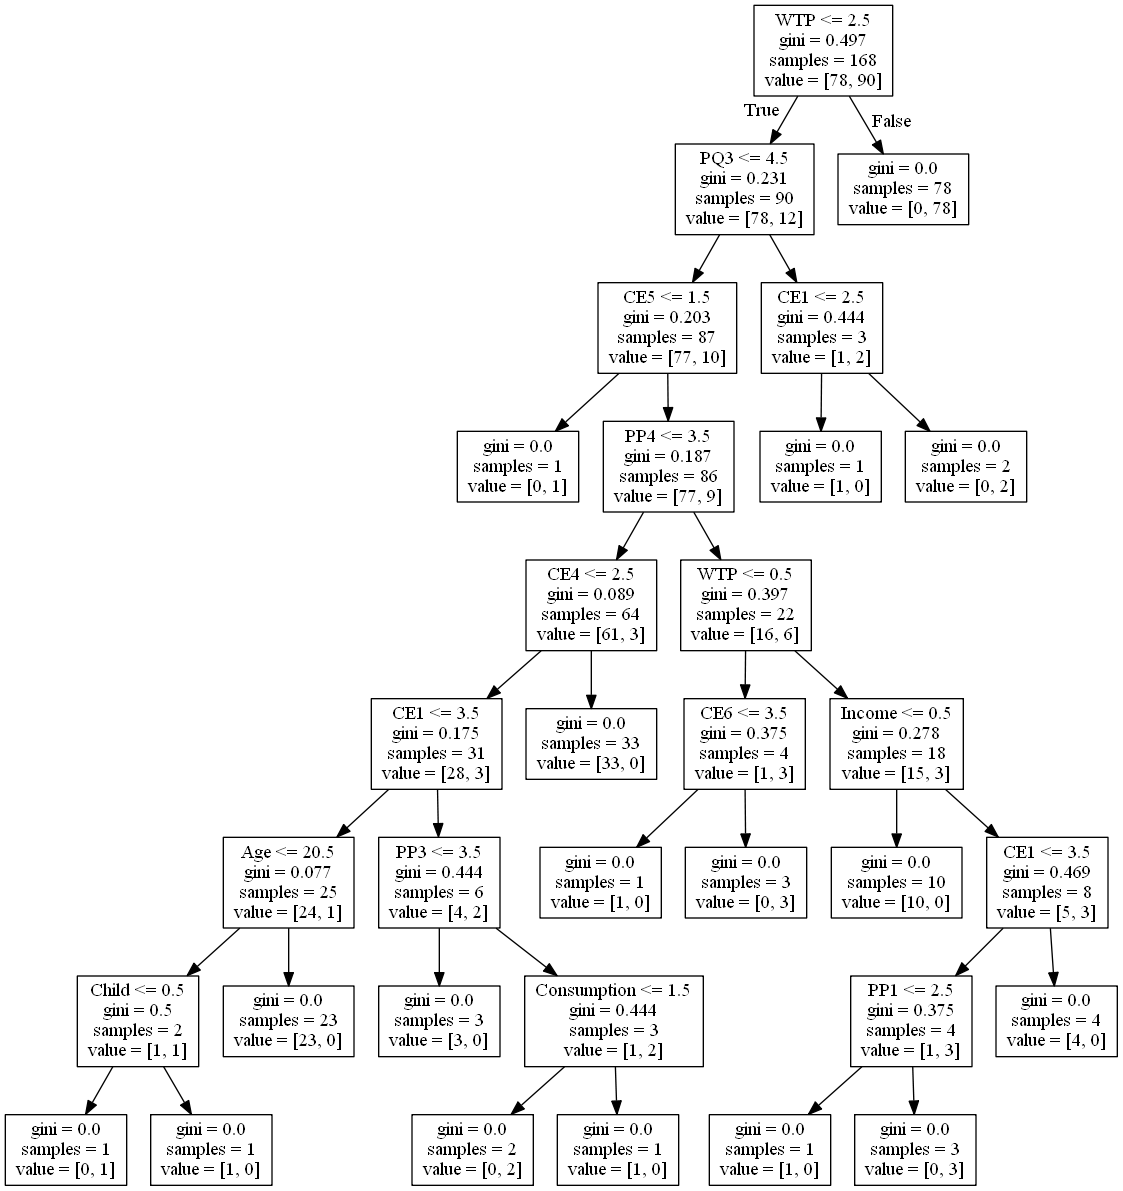

In [7]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,feature_names= X_train.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [8]:
y_pred_dt = dt.predict(X_test)
confusion_matrix(y_test, y_pred_dt)
rmse_dt = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_dt))
mae_dt = sklearn.metrics.mean_absolute_error(y_test, y_pred_dt)
print(rmse_dt,mae_dt)

0.37267799624996495 0.1388888888888889


In [9]:
EPSILON = 1e-10
def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    rae = np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)
    return rae

In [10]:
rae_dt = np.sum(np.abs(y_test - y_pred_dt)) / (np.sum(np.abs(y_test - np.mean(y_test))) + EPSILON)
rae_dt

0.283241542092038

In [11]:
def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))


In [12]:
rrse_dt = rrse(y_test, y_pred_dt)
rrse_dt

0.7526507052980689

In [42]:
#Build MLP model
import tensorflow.keras
from sklearn.neural_network import MLPClassifier
X_train.shape[1]

21

In [38]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\T560\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp
confusion_matrix(y_test, y_pred_mlp)

array([[36,  5],
       [ 5, 26]], dtype=int64)

In [50]:
rmse_mlp = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_mlp))
mae_mlp = sklearn.metrics.mean_absolute_error(y_test, y_pred_mlp)
rae_mlp = rae(y_test, y_pred_mlp)
rrse_mlp = rrse(y_test, y_pred_mlp)
print(rmse_mlp,mae_mlp, rae_mlp, rrse_mlp)

0.37267799624996495 0.1388888888888889 0.283241542092038 0.7526507052980689


In [46]:
#Building Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred_nv = nv.predict(X_test)
y_pred_nv

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [48]:
confusion_matrix(y_test, y_pred_nv)

array([[32,  9],
       [ 4, 27]], dtype=int64)

In [51]:
rmse_nv = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_nv))
mae_nv = sklearn.metrics.mean_absolute_error(y_test, y_pred_nv)
rae_nv = rae(y_test, y_pred_nv)
rrse_nv = rrse(y_test, y_pred_nv)
print(rmse_nv,mae_nv, rae_nv, rrse_nv)

0.42491829279939874 0.18055555555555555 0.3682140047196494 0.8581538378643917


In [61]:
#Building SVM model
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_pred_svm = clf.predict(X_test)
#y_pred_svm[y_pred_svm == -1] = 0
y_pred_svm

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1], dtype=int64)

In [64]:
confusion_matrix(y_test, y_pred_svm)

array([[33,  8],
       [ 4, 27]], dtype=int64)

In [65]:
rmse_svm = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_svm))
mae_svm = sklearn.metrics.mean_absolute_error(y_test, y_pred_svm)
rae_svm = rae(y_test, y_pred_svm)
rrse_svm = rrse(y_test, y_pred_svm)
print(rmse_svm,mae_svm, rae_svm, rrse_svm)

0.408248290463863 0.16666666666666666 0.3398898505104456 0.8244875384278507


In [69]:
#Build RBF model
from __future__ import print_function
from sklearn.gaussian_process.kernels import PairwiseKernel
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [70]:
kernel = 1.0 * RBF(1.0)
rbf = GaussianProcessClassifier(kernel=kernel,random_state=0)
rbf.fit(X_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=0,
                          warm_start=False)

In [72]:
y_pred_rbf = rbf.predict(X_test)
y_pred_rbf

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [73]:
confusion_matrix(y_test, y_pred_rbf)

array([[37,  4],
       [ 4, 27]], dtype=int64)

In [74]:
rmse_rbf = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_rbf))
mae_rbf = sklearn.metrics.mean_absolute_error(y_test, y_pred_rbf)
rae_rbf = rae(y_test, y_pred_rbf)
rrse_rbf = rrse(y_test, y_pred_rbf)
print(rmse_rbf,mae_rbf, rae_rbf, rrse_rbf)

0.3333333333333333 0.1111111111111111 0.2265932336736304 0.6731912561438572
